# Statistical Exploration 
## Justin Heer, Simon Fraser University
An exploration of the raw dataset using statistical techniques from STAT 403 and previous statistical courses

Import libraries

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import normalize
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%config Completer.use_jedi = False
import matplotlib 



Define a correlation function for use in the pairwise plotting 

In [5]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r1, _ = stats.spearmanr(x, y)
    r2,_ = stats.pearsonr(x,y)
    ax = ax or plt.gca()
    ax.annotate(f'spearman r = {r1:.2f}', xy=(.1, .88), xycoords=ax.transAxes)
    ax.annotate(f'pearson r = {r2:.2f}', xy=(.1, .80), xycoords=ax.transAxes)    

import data

In [6]:
df = pd.read_csv(r'database\\healthcare-dataset-stroke-data.csv',index_col=0)

fill NA's with mean interpolation

In [7]:
df['bmi'] = df['bmi'].interpolate()

Get the columns with numerical data and split the data into subsets that contain stroke/ no stroke data

In [8]:
inx = df['stroke'] == 1
num_cols = ['age','avg_glucose_level','bmi']
num_S = df.loc[inx, num_cols]
num_N = df.loc[~inx, num_cols]

Create a pairwise plot to visually determine associations between the covariates

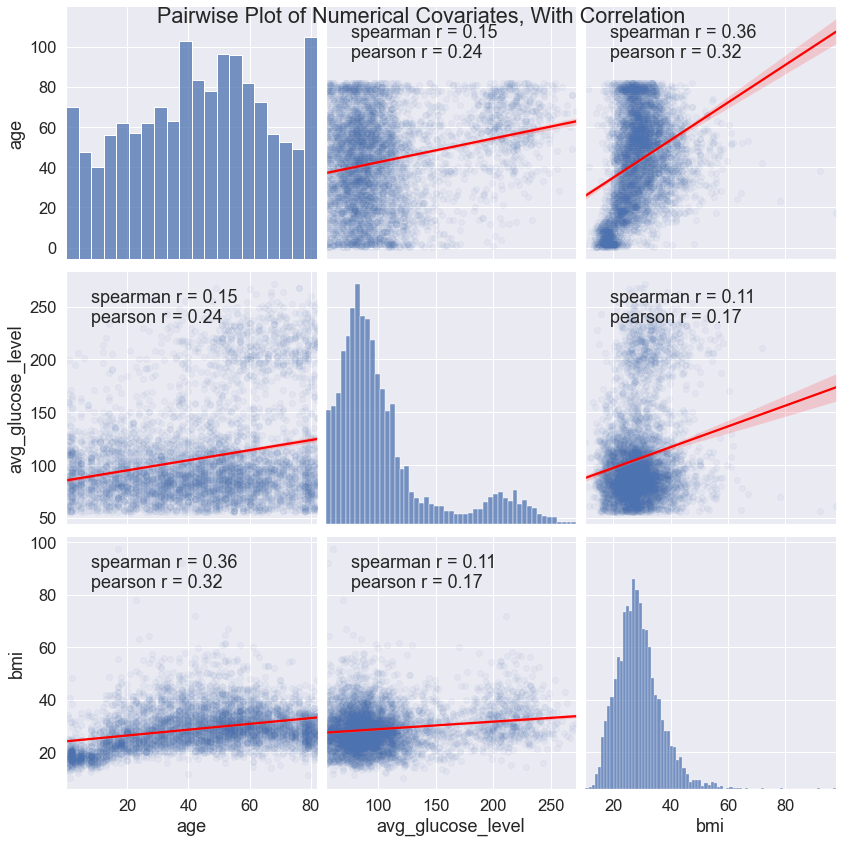

In [9]:
sns.set(font_scale=1.5)
sns_plot = sns.pairplot(df[num_cols],kind='reg',plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}},height=4)
sns_plot.map_lower(corrfunc)
sns_plot.map_upper(corrfunc)
sns_plot.fig.suptitle("Pairwise Plot of Numerical Covariates, With Correlation")

sns_plot.savefig("pairplot.png")

Create a heatmap of the correlation values between the numerical variables

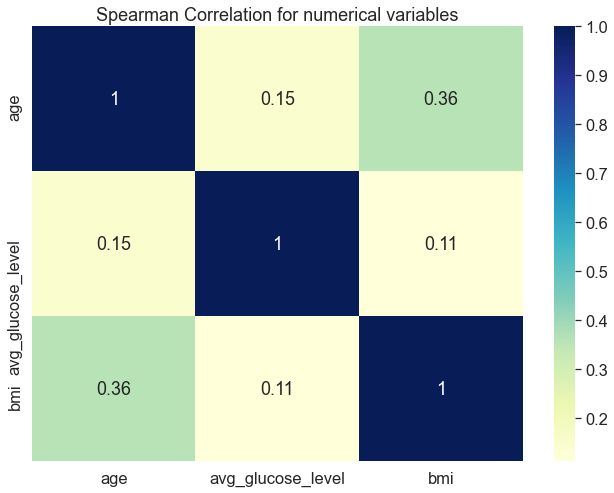

In [10]:
corr = df[num_cols].corr(method='spearman')
fig = plt.figure(figsize = (11,8))
sns_plot = sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title('Spearman Correlation for numerical variables')
figure = sns_plot.get_figure()
figure.savefig("heatmap.png")

Set plotting font and create histograms of the numerical data

In [11]:
font = {'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

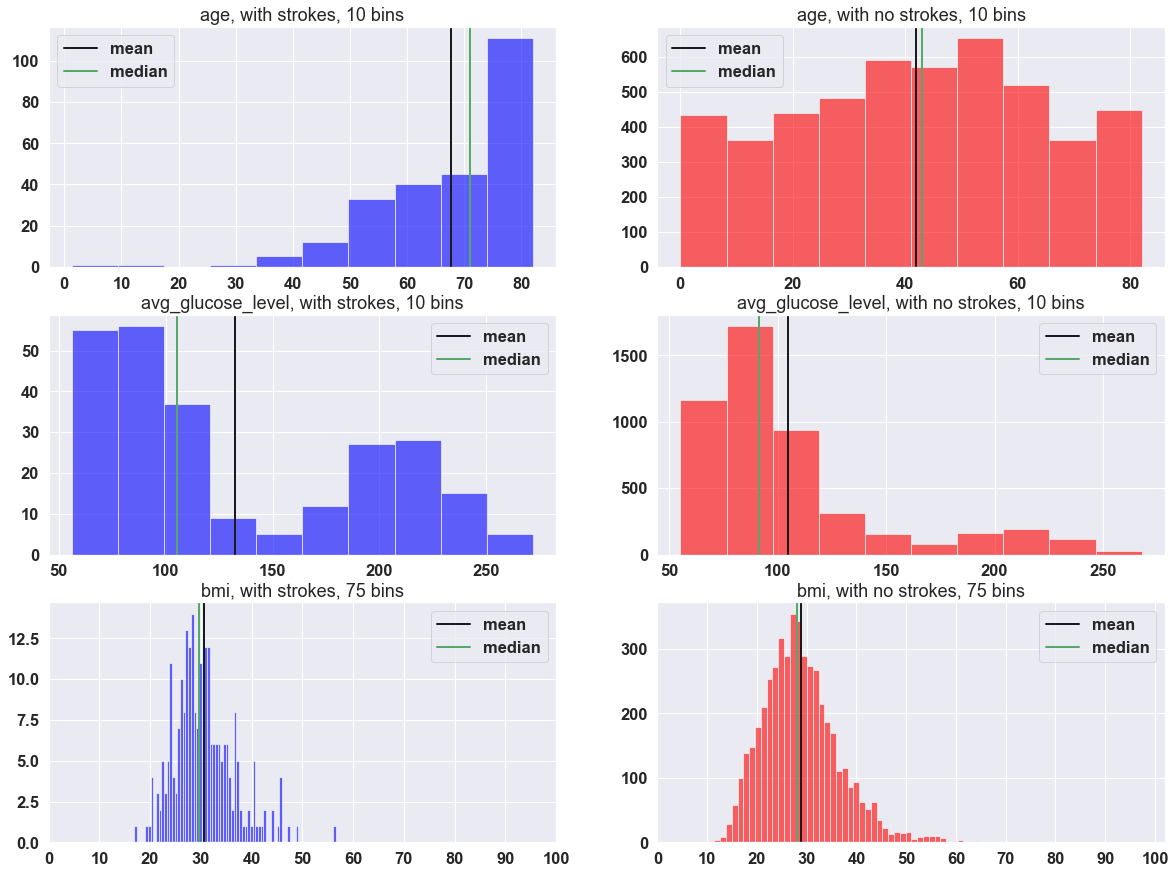

In [12]:
fig, axs = plt.subplots(3,2,figsize=[20,15])
num = 0
for col in num_cols:
    if col == 'bmi':
        plt.sca(axs[num][0])
        
        plt.hist(num_S[col],color='blue',bins=75, alpha=0.6)
        plt.title(col + ", with strokes, 75 bins")
        plt.axvline(x=num_S[col].mean(),linestyle='-', color='k', linewidth=2)
        plt.axvline(x=num_S[col].median(),linestyle='-', color='g', linewidth=2)
        plt.legend(['mean', 'median'])
        plt.xticks(np.linspace(0,100,11))
        
        plt.sca(axs[num][1])
        num+=1
        plt.hist(num_N[col],color='red',bins=75, alpha=0.6)
        plt.title(col+ ", with no strokes, 75 bins")
        plt.axvline(x=num_N[col].mean(),linestyle='-', color='k', linewidth=2)
        plt.axvline(x=num_N[col].median(),linestyle='-', color='g', linewidth=2)
        plt.legend(['mean', 'median'])
        plt.xticks(np.linspace(0,100,11))

    else:
        plt.sca(axs[num][0])

        plt.hist(num_S[col],color='blue', alpha=0.6)
        plt.title(col + ", with strokes, 10 bins")
        plt.axvline(x=num_S[col].mean(),linestyle='-', color='k', linewidth=2)
        plt.axvline(x=num_S[col].median(),linestyle='-', color='g', linewidth=2)
        plt.legend(['mean', 'median'])

        plt.sca(axs[num][1])
        num+=1
        plt.hist(num_N[col],color='red', alpha=0.6)
        plt.title(col+ ", with no strokes, 10 bins")
        plt.axvline(x=num_N[col].mean(),linestyle='-', color='k', linewidth=2)
        plt.axvline(x=num_N[col].median(),linestyle='-', color='g', linewidth=2)
        plt.legend(['mean', 'median'])
# plt.savefig('histograms.png')

Lets compare the mean values for these features filtered by stroke occurence

In [28]:
print(f"The mean values for the patients that had a stroke is \n\n{num_S.mean()} \n\
The mean values for the patients that have not had a stroke is \n\n{num_N.mean()}")

The mean values for the patients that had a stroke is 

age                   67.728193
avg_glucose_level    132.544739
bmi                   30.553815
dtype: float64 
The mean values for the patients that have not had a stroke is 

age                   41.971545
avg_glucose_level    104.795513
bmi                   28.843962
dtype: float64


Conduct a t test for the numerical variables

In [30]:
for col in num_cols:
    print(stats.ttest_ind(num_S[col],num_N[col],equal_var=False))

Ttest_indResult(statistic=29.686265630060234, pvalue=2.1156848483472115e-95)
Ttest_indResult(statistic=6.982411744792964, pvalue=2.4014366563697247e-11)
Ttest_indResult(statistic=4.274773942552323, pvalue=2.5928483897554415e-05)


the t test indicates that the means of patients with strokes is different from no strokes for age, avg_glucose_level and bmi


Examine the categorical variables

In [31]:
bin_cols = ['gender','hypertension','heart_disease','ever_married']

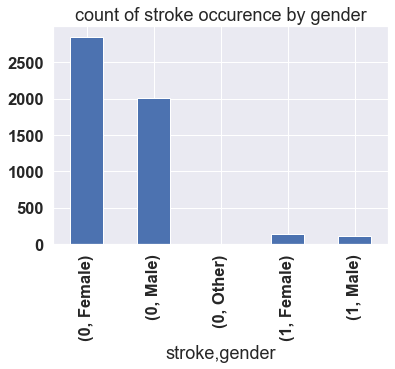

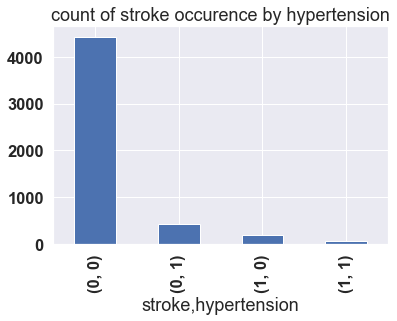

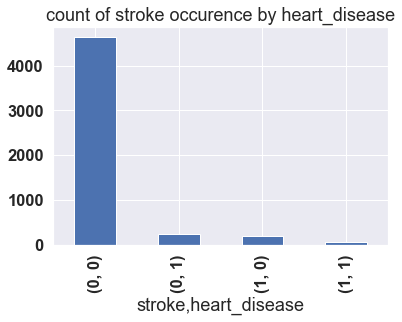

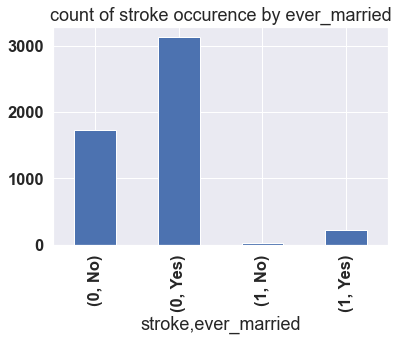

In [32]:
for i in range(0,len(bin_cols)):
# for i in range(0,4):
    df.groupby(['stroke',bin_cols[i]]).agg('count')[['bmi']].plot(kind='bar', 
                                                           title = 'count of stroke occurence by '+bin_cols[i],
                                                           legend = False
                                                           )


Perform Z test on categorical variables

numM = df.query('gender == "Male"').shape[0]
numMStroke = df.query('gender == "Male" & stroke == 1').shape[0]
numF = df.query('gender == "Female"').shape[0]
numFStroke = df.query('gender == "Female" & stroke == 1').shape[0]

In [10]:
sm.stats.proportions_ztest([numMStroke,numFStroke],[numM, numF])

(0.4836398852562626, 0.6286414631826445)

We see that the difference in proportion is not statistically significant at all

In [11]:
inx1 = df['hypertension']==1
inx2 = df['stroke']==1
numH = (inx1).sum()
numNH = (~inx1).sum()
numHS = (inx1&inx2).sum()
numNS = (~inx1&inx2).sum()

In [12]:
sm.stats.proportions_ztest([numHS,numNS],[numH, numNH])

(9.985179861891456, 1.7697981937746714e-23)

We see that the proportion of people with hypertension and having a stroke is statistically higher than the number of people without hypertension and having a stroke

In [13]:
inx1 = df['heart_disease']==1
inx2 = df['stroke']==1
numH = (inx1).sum()
numNH = (~inx1).sum()
numHS = (inx1&inx2).sum()
numNS = (~inx1&inx2).sum()

In [14]:
sm.stats.proportions_ztest([numHS,numNS],[numH, numNH])

(9.66450849471416, 4.266630359370293e-22)

We see that the proportion of people with heart disease and having a stroke is statistically higher than the number of people without heart disease and having a stroke

In [15]:
inx1 = df['ever_married']== 'Yes'
inx2 = df['stroke']==1
numH = (inx1).sum()
numNH = (~inx1).sum()
numHS = (inx1&inx2).sum()
numNS = (~inx1&inx2).sum()

In [16]:
sm.stats.proportions_ztest([numHS,numNS],[numH, numNH])

(7.362992701933523, 1.7983220712673243e-13)

We see that the proportion of people that have been married and having a stroke is statistically higher than the number of people never married and having a stroke. We can also look at the statistical significance of the features using logistic regression
